<a href="https://colab.research.google.com/github/Estebanc0/ADA-Informes/blob/main/Informe_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import random
import numpy as np

In [81]:
def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n])           # Probabilidad de las claves
    q = arr[n:]                 # Probabilidad de las claves ficticias
    return keys, [0]+p, q

# DECRIPCION DEL PROBLEMA

ENTRADA: una matriz de keys de busqueda y una matriz de conteos de frcuencia.

SALIDA: Costo total de todas las búsquedas más pequeño posible

# DESCRIPCION DEL ALGORITMO


El algoritmo utiliza una función para calcular el costo del árbol de búsqueda binario óptimo:




1.   Comprueba casos base (un solo elemento o ninguno)

2.   utilizando una función propia obtiene la suma de los elementos del arreglo de freq desde i a j

1.   inicializa un valor mínimo

2.   uno por uno va considerando todos los elementos como raíz y encuentra recursivamente el costo del BTS y lo va comparando con el valor mínimo y remplazando lo de ser necesario

1.   Y termina retornando el valor mínimo más la suma de los elementos del arreglo





Por último la función main se encarga de ordenar el arreglo de keys de manera creciente y reorganizar el arreglo de frecuencias según corresponda utilizando insertionSort para pasar el arreglo de frecuencias a la función mencionada anteriormente






In [57]:
def insertionSort(arr,a):
  
    # Traverse through 1 to len(arr)
    for i in range(1, len(arr)):
  
        key = arr[i]
        key2 = a[i]
        # Move elements of arr[0..i-1], that are
        # greater than key, to one position ahead
        # of their current position
        j = i-1
        while j >= 0 and key < arr[j] :
                arr[j + 1] = arr[j]
                a[j + 1] = a[j]
                j -= 1
        arr[j + 1] = key
        a[j + 1] = key2
  

In [65]:
#RECURSIVO
def optimalSearchTree(keys, freq, n):

    insertionSort(keys,freq)
    return optCost(freq, 0, n - 1)
 
# A recursive function to calculate
# cost of optimal binary search tree
def optCost(freq, i, j):
    
    global cont
    # Base cases
    if j < i:     # no elements in this subarray
        return 0
    if j == i:     # one element in this subarray
        return freq[i]
     
    # Get sum of freq[i], freq[i+1], ... freq[j]
    fsum = Sum(freq, i, j)
     
    # Initialize minimum value
    Min = 999999999999
     
    # One by one consider all elements as
    # root and recursively find cost of
    # the BST, compare the cost with min
    # and update min if needed
    for r in range(i, j + 1):
        cost = (optCost(freq, i, r - 1) +
                optCost(freq, r + 1, j))
        cont+=1
        
        if cost < Min:
            Min = cost
     
    # Return minimum value
    return Min + fsum
def Sum(freq, i, j):
    s = 0
    for k in range(i, j + 1):
        s += freq[k]
    return s

In [66]:
keys = [10, 12, 20]
freq = [34, 8, 50]
n = len(keys)
cont=0
print("Cost of Optimal BST is",optimalSearchTree(keys, freq, n))
print("llamadas recursivas",cont)

Cost of Optimal BST is 142
llamadas recursivas 7


In [75]:
def optimalD(keys, p, q, n):
    e = [[0 for _ in range(n+1)] for _ in range(n+2)]
    w = [[0 for _ in range(n+1)] for _ in range(n+2)]

    for i in range(1,n+2): 
        e[i][i-1] = q[i-1]
        w[i][i-1] = q[i-1]
    for l in range(1,n+1): 
        for i in range(1, n-l+2):
            j = i+l-1
            e[i][j] = 99999999
            w[i][j] = round(w[i][j-1] + p[j] + q[j], 3)
            for r in range(i, j+1):

                t = round(e[i][r-1] + e[r+1][j] + w[i][j], 3)
               
                if t < e[i][j]:

              
                    e[i][j] = t
                    
    return e
     
    

In [79]:
keys = ["a","b","c","d","e"]
p=[0,0.30,0.05,0.08,0.13,0.43]
q=[0.1,0.1,0.05,0.01,0.05,0.05]
n=5
aux= optimalD(keys, p, q, n)
print(f"El costo del arbol optimo es {aux[1][5]}")

El costo del arbol optimo es 3.36


# Complejidad temporal

función matemática para describir la cantidad de subproblemas que se deben resolver en función del tamaño de entrada
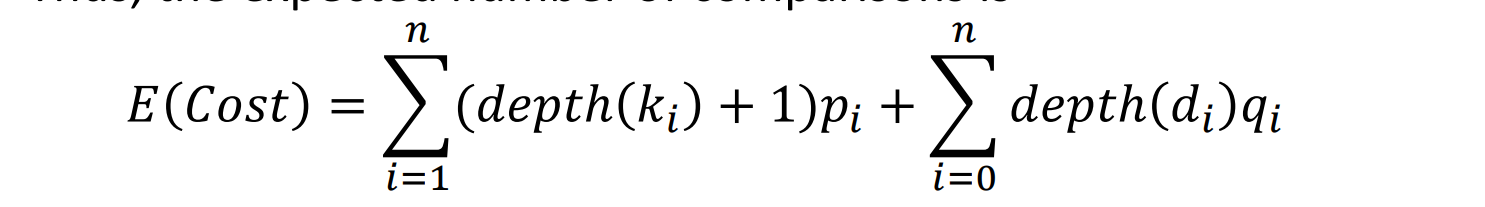

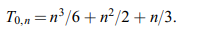


Cada subproblema posee un tiempo de ejecucion de O(n^k+2) y el algoritmo posee un tiempo de ejecucion de 𝑂(𝑛^3), ya que necesitamos calcular 𝑂(𝑛^2) entradas y nosotros
necesita 𝑂(𝑛) tiempo para calcular cada entrada.

# Complejidad espacial
la complejidad espacial en la solución dinámica es O(n^2), ya que necesitamos almacenar O(n^2) valores en 3 matrices para un par de índices i, j donde

𝑗 ≥ 𝑖 − 1.



La solución recursiva no necesita ni almacena información extra a a medida que va resolviendo subproblemas, por lo que su complejidad espacial es de O(1)

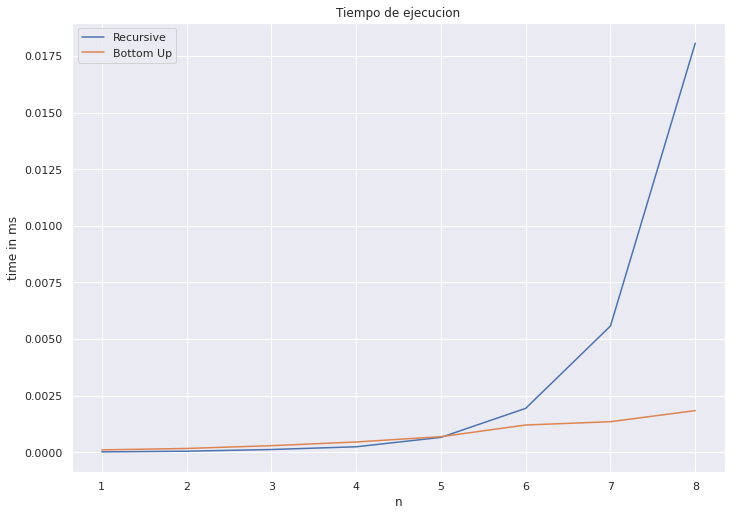

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from timeit import repeat
import numpy as np

%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='dark')
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Tiempo

x=[]; x2=[]
y=[]; y2=[]

for n in range(1,9):
  keys, p, q = optimal_bst_instance_generator(n)

  t = repeat(setup="from __main__ import optimalSearchTree", stmt=f"optimalSearchTree({keys},{p}, {n})", repeat=1, number=10)
  
  x.append(n)
  y.append(t)

  t = repeat(setup="from __main__ import optimalD", stmt=f"optimalD({keys},{p}, {q.tolist()}, {n})", repeat=1, number=10)
  
  x2.append(n)
  y2.append(t)

  
plt.plot(x,y)
plt.plot(x2,y2)
plt.legend(["Recursive", "Bottom Up"])
plt.title("Tiempo de ejecucion")

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

Como se puede apreciar en el gráfico anterior la solución recursiva posee un mayor tiempo de ejecución que la solución dinámica aunque como era de esperarse en ambos caso el tiempo de ejecución aumenta a medida que el tamaño de los arreglos aumenta